# Live Code 2 - Phase 1
Muhammad Ikhsan Rahman Hakim - FTDS001


**--About data set--**


This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack


Attribute Information
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target: 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, roc_curve, auc, classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from graphviz import Source
from sklearn.tree import export_graphviz

%matplotlib inline

# Data Loading

In [2]:
# we can see all column
pd.set_option('display.max_columns', 100)
# to make stable randomness
np.random.seed(42)

In [3]:
df = pd.read_csv('heart.csv')

# Dataset Exploration

In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Data Cleaning

## Missing Value

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Duplicate Rows

In [8]:
print('Any duplicated rows? ', df.duplicated().any())
print('How many? ', df.duplicated().sum())

Any duplicated rows?  True
How many?  1


In [9]:
df.loc[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
# drop duplicate row
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().any()

False

# Data Exploration (EDA)

In [12]:
# style plot theme
plt.style.use('fivethirtyeight')

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


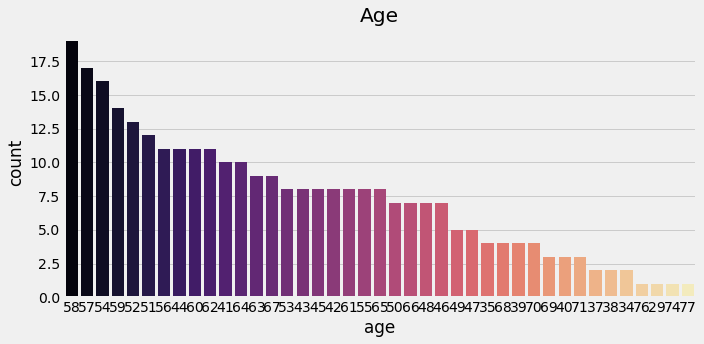

In [14]:
plt.figure(figsize = (10, 5))
sns.countplot(
    x = df["age"],
    order = df["age"].value_counts().sort_values(ascending = False).index,
    palette = "magma"
)
plt.title("Age", fontweight = 20)

plt.tight_layout()
plt.show()

Most of our patient's age are 58

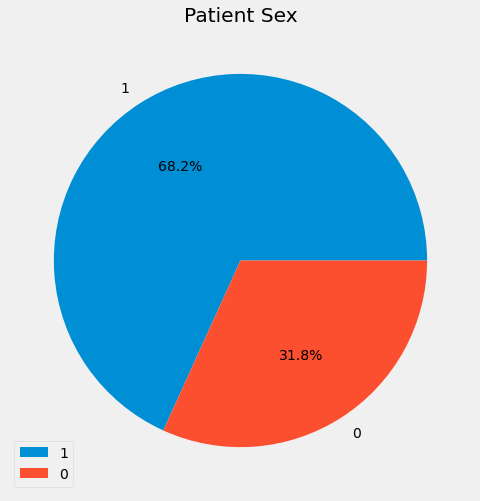

In [15]:
plt.figure(figsize = (8,8))

plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().index, autopct='%1.1f%%')
plt.title("Patient Sex")
plt.legend()
plt.show()

Most of our patient are variable 1.

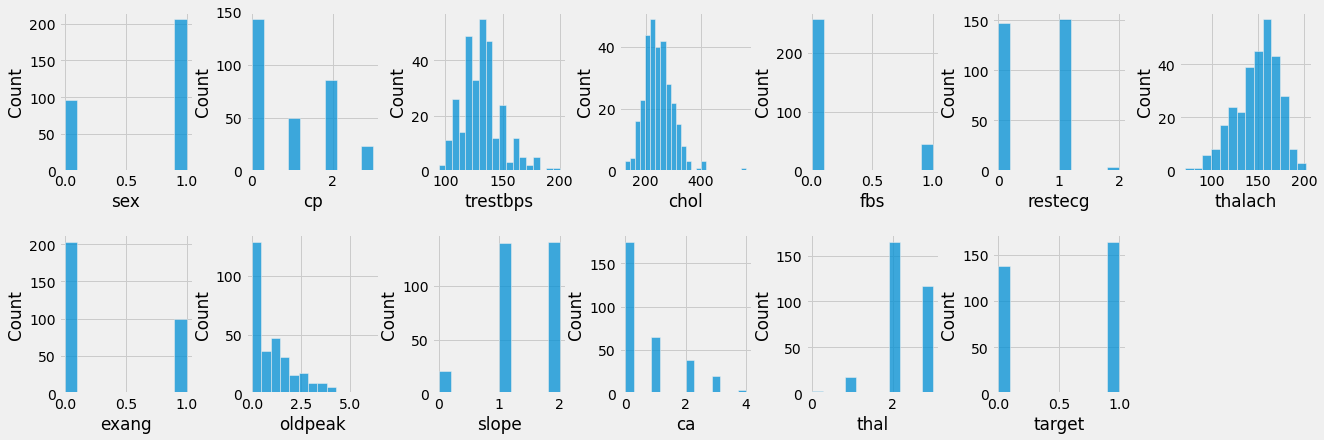

In [16]:
col = list(df.columns)

fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(col)):
    ax = fig.add_subplot(5, 7, i)
    #ax.hist(df[col[i]])
    sns.histplot(df[col[i]])
    plt.xlabel(col[i])

## Target data distribution

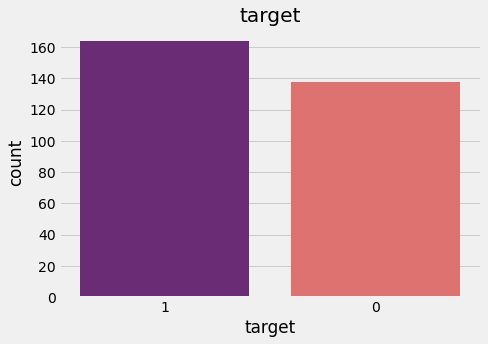

In [17]:
plt.figure(figsize = (7, 5))
sns.countplot(
    x = df["target"],
    order = df["target"].value_counts().sort_values(ascending = False).index,
    palette = "magma"
)
plt.title("target", fontweight = 20)

plt.tight_layout()
plt.show()

Our target distribution data not to looks imbalance.

## Correlation Matrix

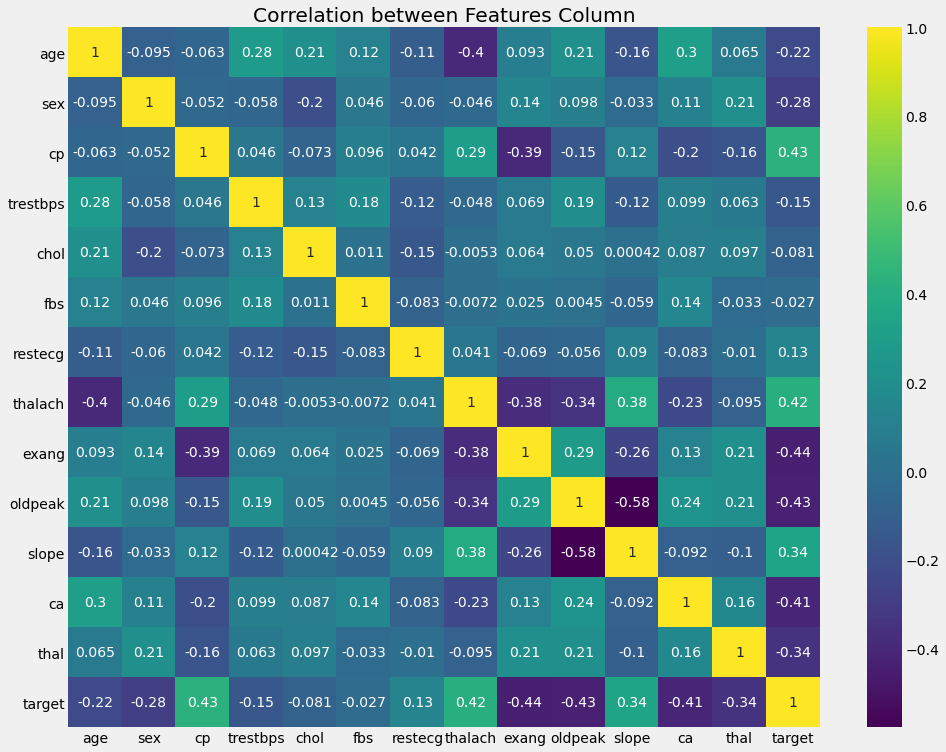

In [18]:
corr = df[col].corr(method = 'pearson')

plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='viridis', annot=True)
            
plt.title("Correlation between Features Column")
plt.show()

From correlation matrix, we will drop column that has many negative correlation ( > -0.5 ).

 - oldpeak

# Data Preprocessing

In [19]:
new_df = df.drop(columns = ['oldpeak'])

In [20]:
new_df.shape

(302, 13)

In [21]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,0,2,1
2,41,0,1,130,204,0,0,172,0,2,0,2,1
3,56,1,1,120,236,0,1,178,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,2,0,2,1


## Split Dataset

In [22]:
X = new_df.drop(columns = ["target"])
y = new_df["target"]

In [23]:
X.shape, y.shape

((302, 12), (302,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Scalling

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [26]:
X_train_trf = scaler.transform(X_train)
X_test_trf = scaler.transform(X_test)

# Define Model, Training and Evaluation (Default params)

In [27]:
# Evaluate function

def evaluate(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("TRAINING RESULTS: \n===============================")
    model_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"F1 SCORE:\n{f1_score(y_train, y_train_pred)}")
    print(f"CLASSIFICATION REPORT:\n{model_report}\n")

    print("TESTING RESULTS: \n===============================")
    model_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1 SCORE:\n{f1_score(y_test, y_test_pred)}")
    print(f"CLASSIFICATION REPORT:\n{model_report}")

### Decision Tree

In [28]:
model_tree = DecisionTreeClassifier(random_state=42)
%time model_tree.fit(X_train_trf, y_train)

%time evaluate(model_tree, X_train_trf, y_train, X_test_trf, y_test)

Wall time: 1 ms
TRAINING RESULTS: 
CONFUSION MATRIX:
[[ 96   0]
 [  0 115]]
ACCURACY SCORE:
1.0000
F1 SCORE:
1.0
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    96.0  115.0       1.0      211.0         211.0

TESTING RESULTS: 
CONFUSION MATRIX:
[[34  8]
 [13 36]]
ACCURACY SCORE:
0.7692
F1 SCORE:
0.7741935483870968
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.723404   0.818182  0.769231   0.770793      0.774438
recall      0.809524   0.734694  0.769231   0.772109      0.769231
f1-score    0.764045   0.774194  0.769231   0.769119      0.769510
support    42.000000  49.000000  0.769231  91.000000     91.000000
Wall time: 23 ms


In [29]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "heartattack_decision_tree"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

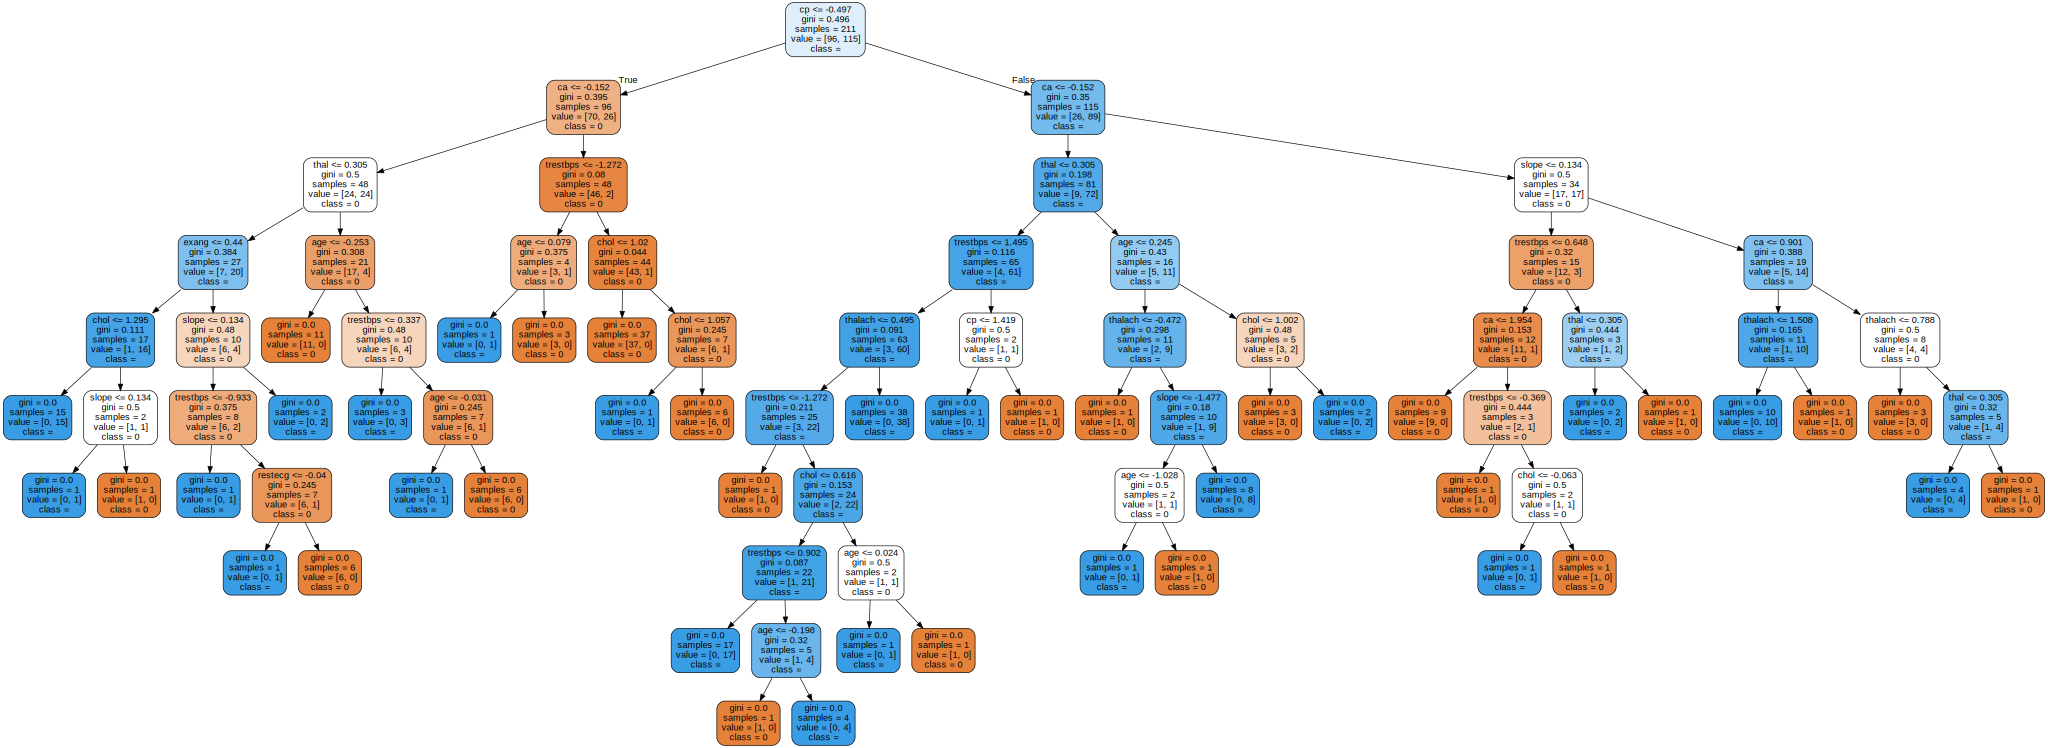

In [30]:

export_graphviz(
        model_tree,
        out_file=os.path.join(IMAGES_PATH, "heartattack_decision_tree.dot"),
        feature_names=X.columns,
        class_names=str(y),
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "heartattack_decision_tree.dot"))

### Random Forest

In [31]:
model_rf = RandomForestClassifier(random_state=42)
%time model_rf.fit(X_train_trf, y_train)

%time evaluate(model_rf, X_train_trf, y_train, X_test_trf, y_test)

Wall time: 153 ms
TRAINING RESULTS: 
CONFUSION MATRIX:
[[ 96   0]
 [  0 115]]
ACCURACY SCORE:
1.0000
F1 SCORE:
1.0
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    96.0  115.0       1.0      211.0         211.0

TESTING RESULTS: 
CONFUSION MATRIX:
[[35  7]
 [ 8 41]]
ACCURACY SCORE:
0.8352
F1 SCORE:
0.845360824742268
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.813953   0.854167  0.835165   0.834060      0.835607
recall      0.833333   0.836735  0.835165   0.835034      0.835165
f1-score    0.823529   0.845361  0.835165   0.834445      0.835285
support    42.000000  49.000000  0.835165  91.000000     91.000000
Wall time: 43 ms


### ROC Curve (Default params)

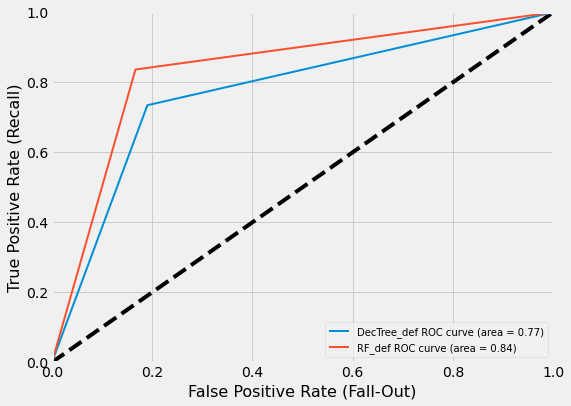

In [32]:
# ROC Curve best setting
plt.figure(figsize=(8, 6))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

labels=['DecTree_def', 'RF_def']
for idx,model in enumerate([model_tree , model_rf]):
    y_scores = model.predict(X_test_trf)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right",prop={'size': 10})

# Define Model, Training and Evaluation (Best params with Grid Search)

## Decision Tree

In [33]:
tstart = time.time() #for calculating processing time

criterion = ['gini', 'entropy']
min_samples_leaf = [1, 2]

params_grid = {'criterion': criterion, 'min_samples_leaf': min_samples_leaf}

# train model with default setting
model_tree = DecisionTreeClassifier(random_state=42)
model_tree_gridCV = GridSearchCV(model_tree, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


model_tree_gridCV.fit(X_train_trf, y_train)
best_params = model_tree_gridCV.best_params_
print(f"Best parameters: {best_params}")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')

# train model with best parameters setting
model_tree_best = DecisionTreeClassifier(**best_params)
model_tree_best.fit(X_train_trf, y_train)

evaluate(model_tree_best, X_train_trf, y_train, X_test_trf, y_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'criterion': 'entropy', 'min_samples_leaf': 2}
Elapsed prediction time:  3327.09  ms
TRAINING RESULTS: 
CONFUSION MATRIX:
[[ 95   1]
 [  9 106]]
ACCURACY SCORE:
0.9526
F1 SCORE:
0.954954954954955
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.913462    0.990654  0.952607    0.952058      0.955533
recall      0.989583    0.921739  0.952607    0.955661      0.952607
f1-score    0.950000    0.954955  0.952607    0.952477      0.952701
support    96.000000  115.000000  0.952607  211.000000    211.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[36  6]
 [16 33]]
ACCURACY SCORE:
0.7582
F1 SCORE:
0.75
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.692308   0.846154  0.758242   0.769231      0.775148
recall      0.857143   0.673469  0.758242   0.765306      0.758242
f1-score    0.765957   0.750000  0.75824

In [34]:
# Tree picture with best params

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "heartattack_decision_tree_best"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

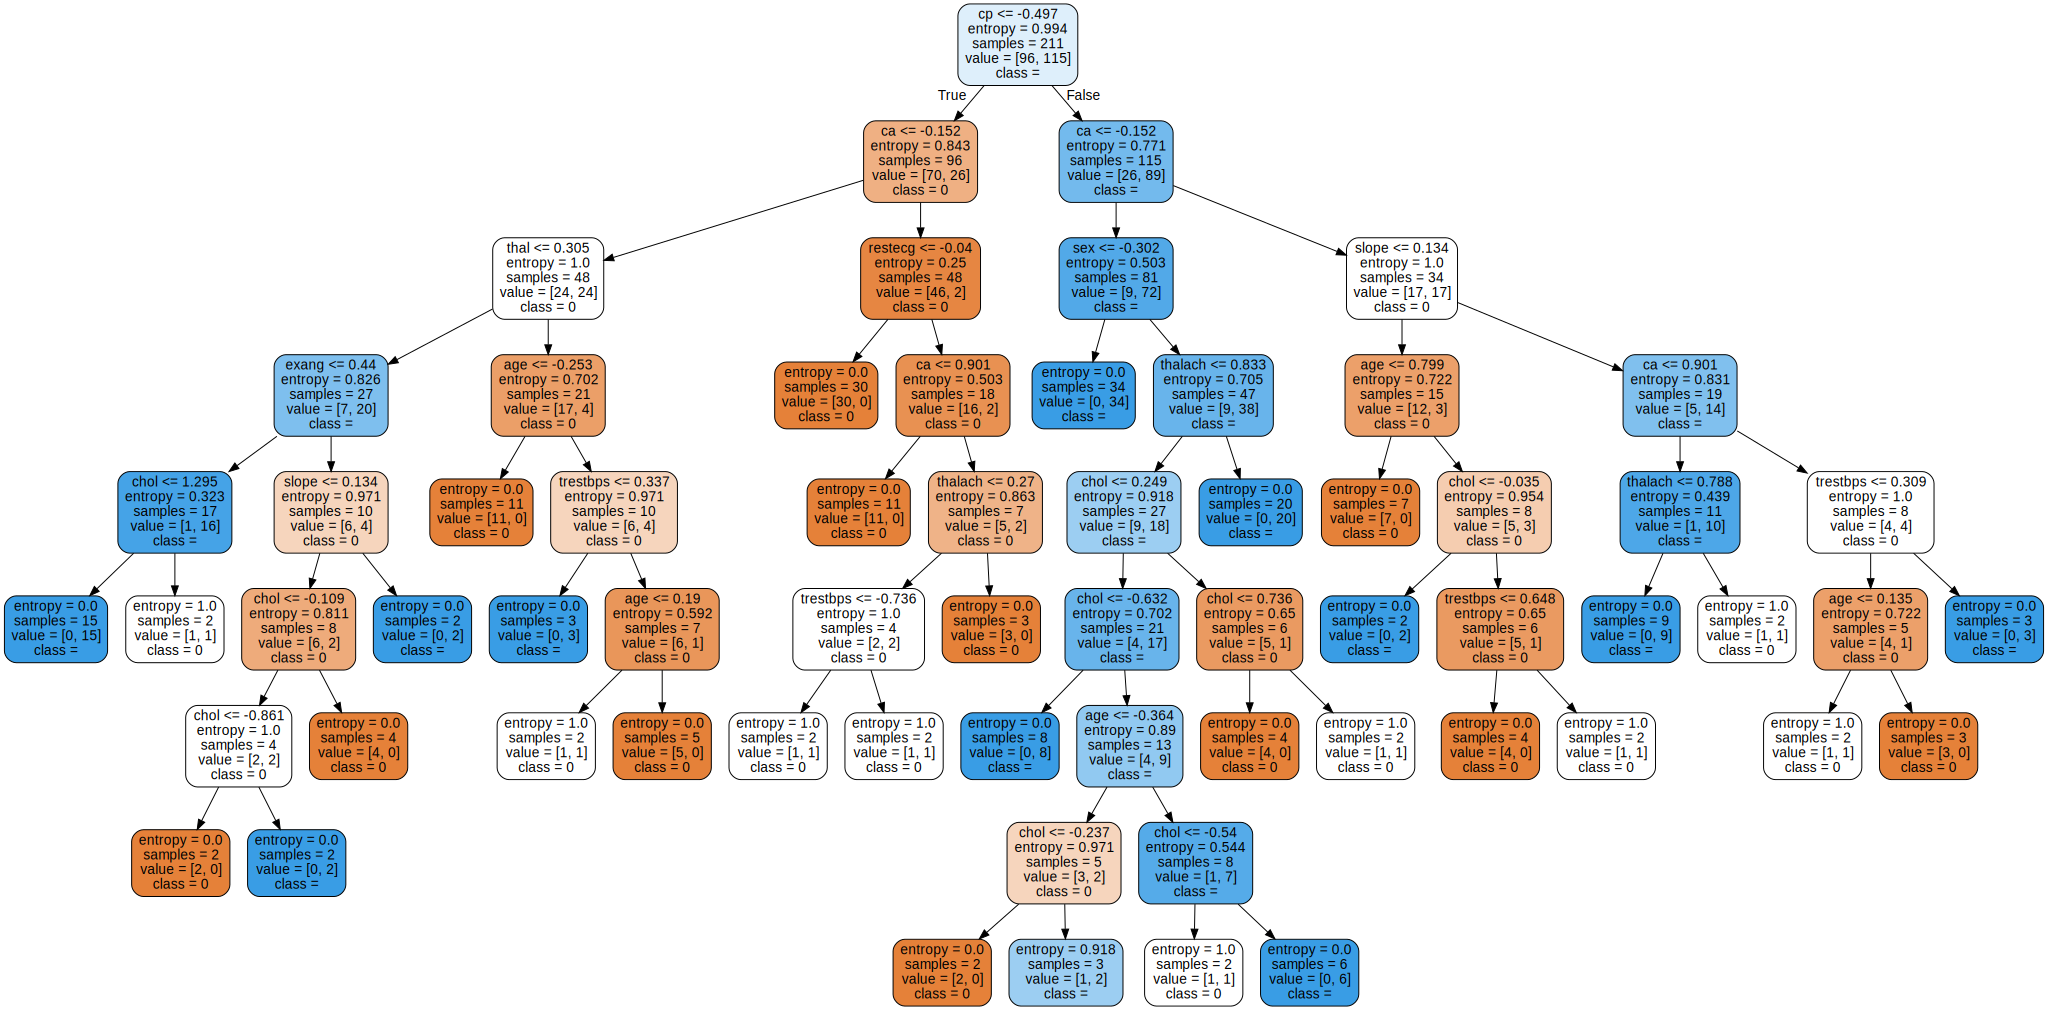

In [35]:
export_graphviz(
        model_tree_best,
        out_file=os.path.join(IMAGES_PATH, "heartattack_decision_tree_best.dot"),
        feature_names=X.columns,
        class_names=str(y),
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "heartattack_decision_tree_best.dot"))

## Random Forest

In [36]:
tstart = time.time() #for calculating processing time

n_estimators = [100, 500]
max_features = ['auto', 'sqrt']

params_grid = {'n_estimators': n_estimators, 'max_features': max_features}

# train model with default setting
model_rf = RandomForestClassifier(random_state=42)
model_rf_gridCV = GridSearchCV(model_rf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


model_rf_gridCV.fit(X_train_trf, y_train)
best_params = model_rf_gridCV.best_params_
print(f"Best parameters: {best_params}")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')

# train model with best parameters setting
model_rf_best = RandomForestClassifier(**best_params)
model_rf_best.fit(X_train_trf, y_train)

evaluate(model_rf_best, X_train_trf, y_train, X_test_trf, y_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'max_features': 'auto', 'n_estimators': 500}
Elapsed prediction time:  2989.12  ms
TRAINING RESULTS: 
CONFUSION MATRIX:
[[ 96   0]
 [  0 115]]
ACCURACY SCORE:
1.0000
F1 SCORE:
1.0
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    96.0  115.0       1.0      211.0         211.0

TESTING RESULTS: 
CONFUSION MATRIX:
[[35  7]
 [ 9 40]]
ACCURACY SCORE:
0.8242
F1 SCORE:
0.8333333333333334
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.795455   0.851064  0.824176   0.823259      0.825398
recall      0.833333   0.816327  0.824176   0.824830      0.824176
f1-score    0.813953   0.833333  0.824176   0.823643      0.824389
support    42.000000  49.00000

### ROC Curve

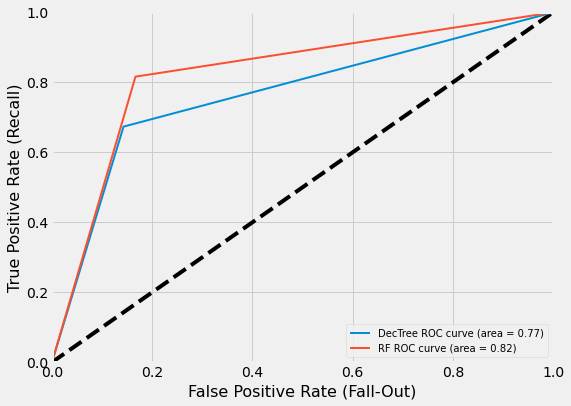

In [37]:
# ROC Curve best setting
plt.figure(figsize=(8, 6))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

labels=['DecTree', 'RF']
for idx,model in enumerate([model_tree_best , model_rf_best]):
    y_scores = model.predict(X_test_trf)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right",prop={'size': 10})

## Cross Validation 10-Fold

#### Decision Tree

In [38]:
%time accuracy_cv_tree = cross_val_score(model_tree, X, y, cv=10, scoring='accuracy')
print('Cross Validation Score: ', accuracy_cv_tree)

#get the mean of each fold 
print("Average Cross Validation score:", accuracy_cv_tree.mean() * 100)

Wall time: 59 ms
Cross Validation Score:  [0.80645161 0.80645161 0.76666667 0.76666667 0.83333333 0.6
 0.7        0.8        0.63333333 0.73333333]
Average Cross Validation score: 74.46236559139786


#### Random forest

In [39]:
%time accuracy_cv_rf = cross_val_score(model_rf, X, y, cv=10, scoring='accuracy')
print('Cross Validation Score: ', accuracy_cv_rf)

#get the mean of each fold 
print("Average Cross Validation score:", accuracy_cv_rf.mean() * 100)

Wall time: 1.69 s
Cross Validation Score:  [0.90322581 0.77419355 0.86666667 0.9        0.83333333 0.8
 0.76666667 0.83333333 0.7        0.8       ]
Average Cross Validation score: 81.7741935483871


# Model Inference

## Decision Tree

In [40]:
pred_result = []

model_pred = model_tree_best.predict(X_test_trf)
pred_result.append(model_pred)

#insert predict result to dataframe
pred_result_tree = pd.DataFrame({
    "Actual Target":y_test,
    "Prediction with LR":pred_result[0]
})

pred_result_tree.head()

,Actual Target,Prediction with LR
180,0,0
229,0,0
111,1,0
247,0,0
60,1,1


## Random Forest

In [41]:
pred_result1 = []

model_pred1 = model_rf_best.predict(X_test_trf)
pred_result1.append(model_pred1)

#insert predict result to dataframe
pred_result_rf = pd.DataFrame({
    "Actual Target":y_test,
    "Prediction with LR":pred_result1[0]
})

pred_result_rf.head()

,Actual Target,Prediction with LR
180,0,0
229,0,0
111,1,1
247,0,0
60,1,1


# Conclusion

## Overall Analysis EDA
 
- Rata-rata umur pasien dari dataset adalah 54 tahun dan Umur 58 menjadi mayoritas umur di dataset ini.
- Kebanyakan jenis kelamin pasien di dataset ini adalah variabel 1 (Jika pelabelan menggunakan encoder, maka variabel 1 ini kemungkinan adalah "Women" atau wanita dikarenakan encoder melakukan pelabelan secara runut menurut abjad 'alphabethical' dan 0 sebagai "Men" atau Pria. Namun ini hanya asumsi penulis saja, bisa saja berbeda pengertian dengan institusi sumber dataset ini.)
- Beberapa data terdistribusi secara normal namun ada beberapa juga yang *skewed* ke kanan. Namun masih dalam batas wajar.
- Distribusi data pada target sendiri tidak telalu jauh perbedaannya, masih dalam batas wajar sehingga tidak perlu dilakukan resampling (down ataupun upsampling).

## Model Analysis

- With best parameters from GridSearchCV, we got the highest stats is Random Forest.
  - DT = 
    - **Accuracy score** 0.75, **f1score** 0.75, **ROC_AUC** 0.77
  - RF = 
    - **Accuracy score** 0.82, **f1score** 0.83, **ROC_AUC** 0.82


**--Confussion Matrix--**

(TN: True Negative, FP: False Positive, FN: False Negative, TP: True Positive)
>- DecTree
    - TN = 36 , FP = 6 , FN = 16 , TP = 33
>- RandomForest
    - TN = 35 , FP = 7 , FN = 9 , TP = 40
    
    

Dari hasil diatas dapat terlihat bahwa *Random Forest* mengalahkan *Decision Tree* dari berbagai skor evaluasi. Walaupun saat menggunakan *best parameter* dari *Grid Search* terdapat sedikit penurunan nilai skor pada kedua model, *Random Forest* tetap menjadi pemilik nilai skor tertinggi. Dari segi waktu komputasi sendiri, *Decision Tree* memang sedikit lebih baik dari *Random Forest* hanya terpaut beberapa milisecond saja. Waktu komputasi *Random Forest* hanya unggul disaat pencarian *Best Parameters* menggunakan *Grid Search* dengan waktu 2406ms, sementara *Grid Search* memerlukan waktu 3660ms.

Dan berdasarkan *Confusion Matrix*, *Random Forest* memiliki nilai TP lebih tinggi dari *Decision Tree*, yang berarti model dapat memprediksi dengan benar jika seorang pasien memang memiliki kemungkinan risiko terkena serangan jantung sehingga tenaga medis dapat memberikan pengawasan, anjuran dan penanganan yang tepat dan lebih baik. Begitu juga dengan nilai FP *Random Forest* yang sedikit lebih tinggi dan FN yang jauh lebih kecil dari *Decision Tree*. Ini adalah hal yang bagus karena lebih baik pasien tersebut terdiagnosa berisiko terkena serangan jantung padahal sebenarnya tidak, daripada sebaliknya. Karena jika FN semakin tinggi maka cost yang diperlukan untuk memperbaikinya sangatlah tinggi, terlebih ini berkaitan dengan medis.

